In [1]:
import torch
import torch.nn.functional as F
from torchmetrics.functional import dice, jaccard_index
from skimage.metrics import hausdorff_distance
from medpy.metric.binary import precision as medpy_precision, recall as medpy_recall
import segmentation_models_pytorch as smp
from torch.utils.data import DataLoader
from torchmetrics.classification import Dice
import matplotlib.pyplot as plt
import numpy as np

from levee_hunter.augmentations import (
    no_deformations_transform,
    normalize_only,
    train_transform,
)
from levee_hunter.plots import infer_and_visualize

/Users/pawel/miniforge3/envs/Fathom/lib/python3.11/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/Users/pawel/miniforge3/envs/Fathom/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <EB3FF92A-5EB1-3EE8-AF8B-5923C1265422> /Users/pawel/miniforge3/envs/Fathom/lib/python3.11/site-packages/torchvision/image.so
  Reason: tried: '/Users/pawel/miniforge3/envs/Fathom/lib/python3.11/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/pawel/miniforge3/envs/Fathom/lib/python3.11/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/pawel/miniforge3/envs/Fathom/lib/python3.11/lib-dynload/../../libjpeg.9.dylib' (no such file), '/Users/pawel/miniforge3/envs/Fathom/bin/../lib/libjpeg.9.dylib' (no such file)'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# Load the datasets
train_dataset_1m = torch.load(
    "../data/processed/w3-4-based-datasets/train_dataset_1m_512.pth"
)
val_dataset_1m = torch.load(
    "../data/processed/w3-4-based-datasets/val_dataset_1m_512.pth"
)
bad_dataset_1m = torch.load(
    "../data/intermediate/w3-4-based-datasets/bad_dataset_1m_512.pth"
)

train_dataset_13 = torch.load(
    "../data/processed/w3-4-based-datasets/train_dataset_13_512.pth"
)
val_dataset_13 = torch.load(
    "../data/processed/w3-4-based-datasets/val_dataset_13_512.pth"
)
bad_dataset_13 = torch.load(
    "../data/intermediate/w3-4-based-datasets/bad_dataset_13_512.pth"
)


train_dataset_13_256 = torch.load(
    "../data/processed/w3-4-based-datasets/train_dataset_13_256.pth"
)
val_dataset_13_256 = torch.load(
    "../data/processed/w3-4-based-datasets/val_dataset_13_256.pth"
)
bad_dataset_13_256 = torch.load(
    "../data/intermediate/w3-4-based-datasets/bad_dataset_13_256.pth"
)

print(len(train_dataset_1m), len(val_dataset_1m), len(bad_dataset_1m))

print(len(train_dataset_13), len(val_dataset_13), len(bad_dataset_13))

print(len(train_dataset_13_256), len(val_dataset_13_256), len(bad_dataset_13_256))

/var/folders/tk/2_f29kq533g52jyhs9y4xt000000gn/T/ipykernel_20503/14598141.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_dataset_1m = torch.load(
/var/folders/tk/

704 177 112
343 86 190
838 149 417


In [4]:
bad_dataset_13.weights_return = False
bad_dataset_13_256.weights_return = False
bad_dataset_1m.weights_return = False


bad_dataset_1m.transform = normalize_only
bad_dataset_13.transform = normalize_only
bad_dataset_13_256.transform = normalize_only

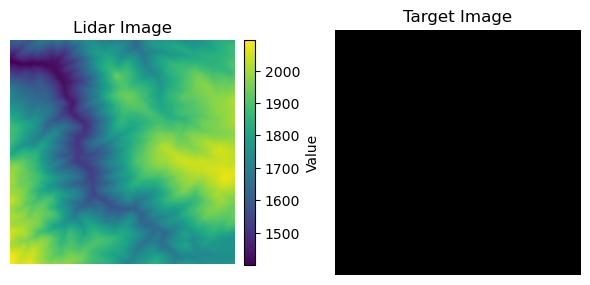

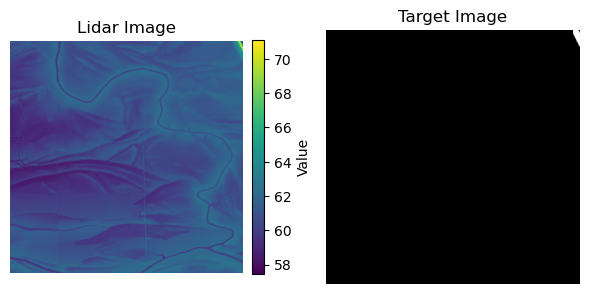

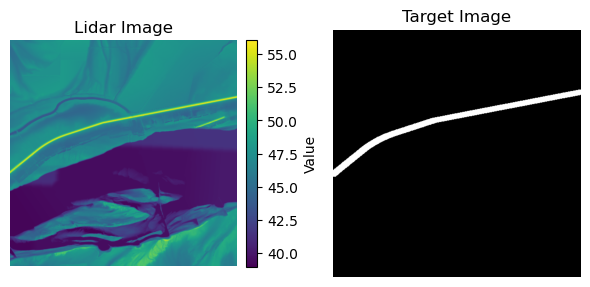

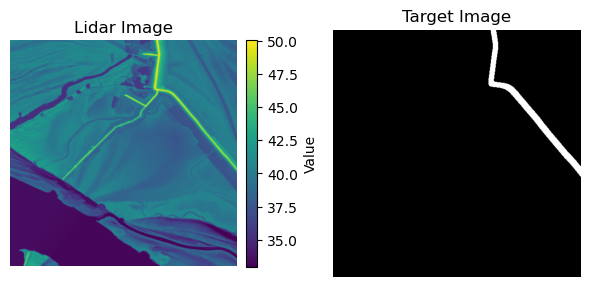

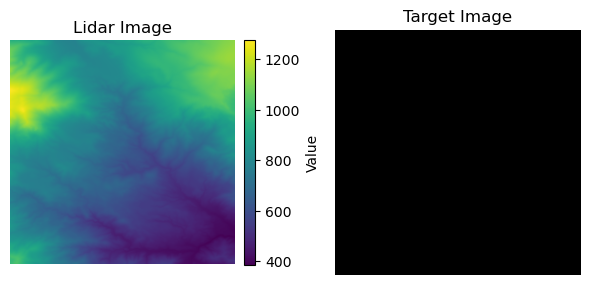

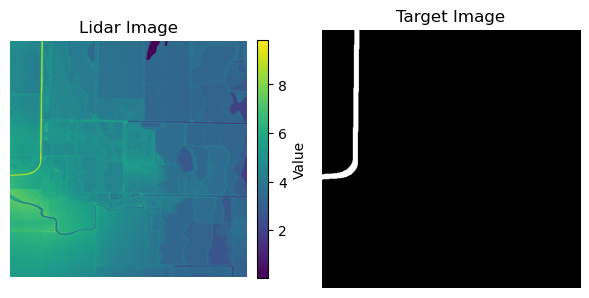

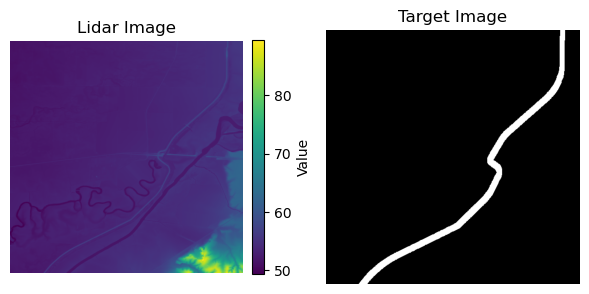

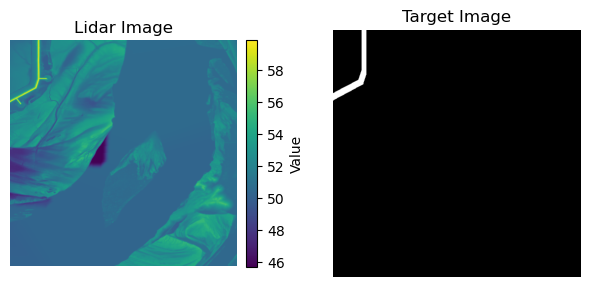

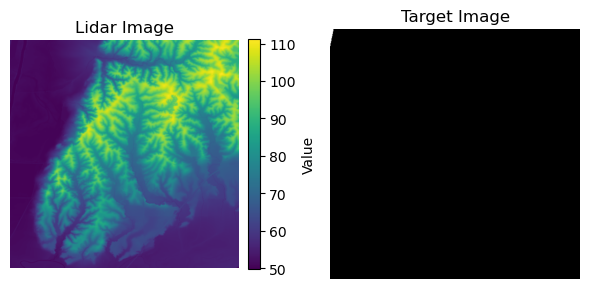

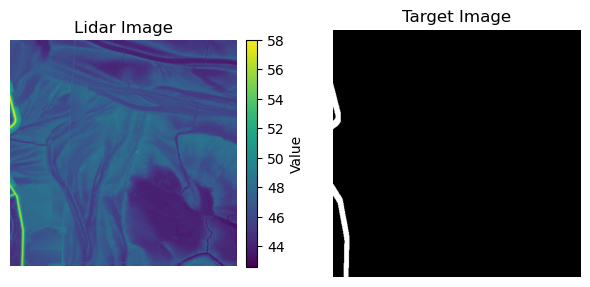

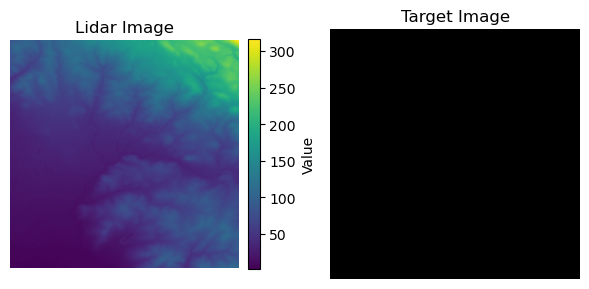

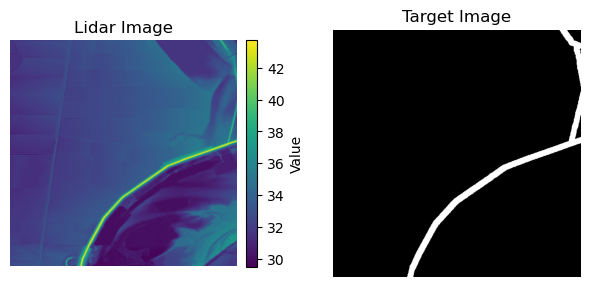

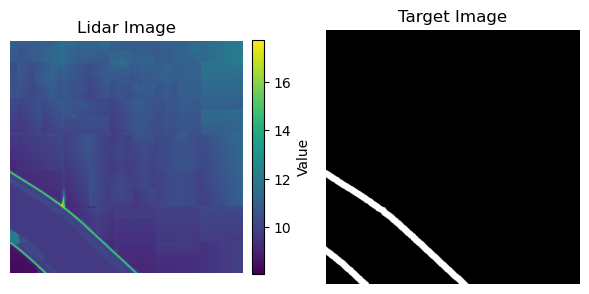

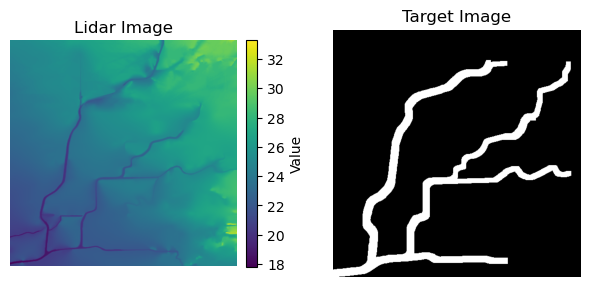

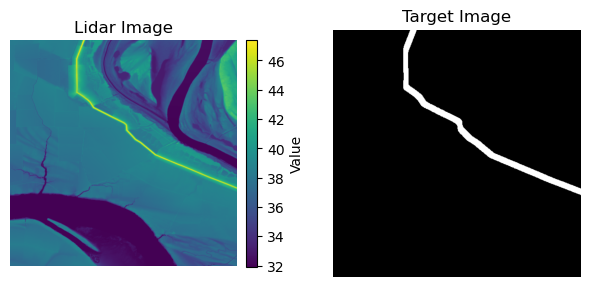

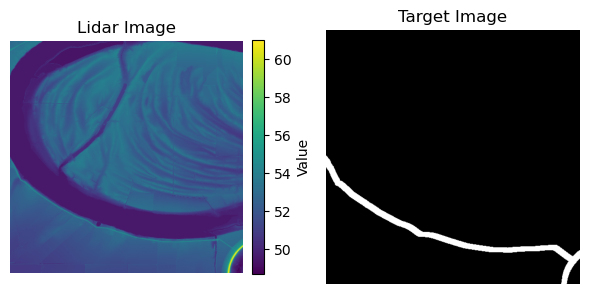

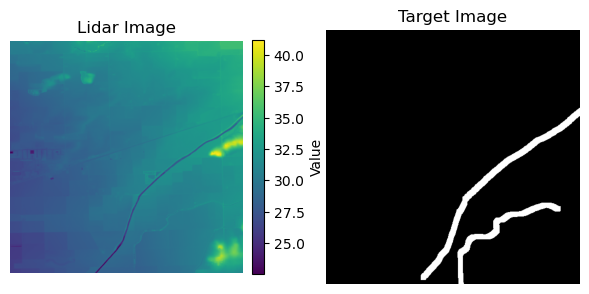

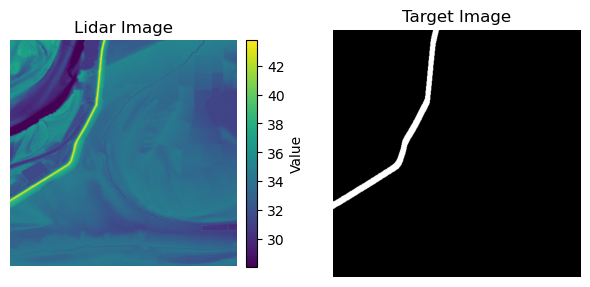

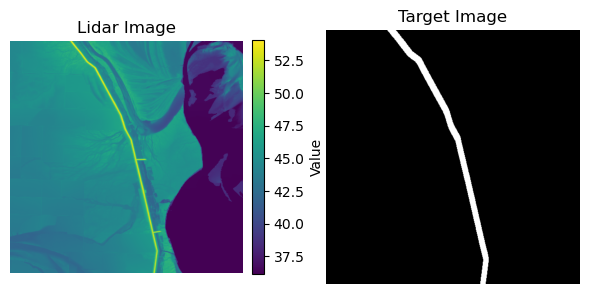

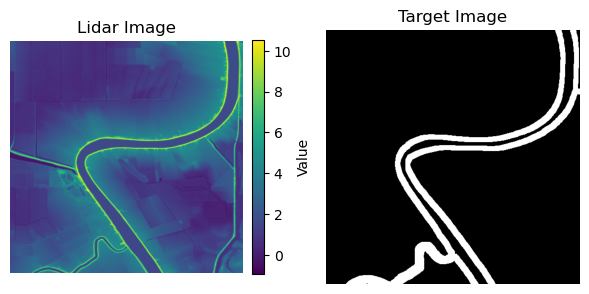

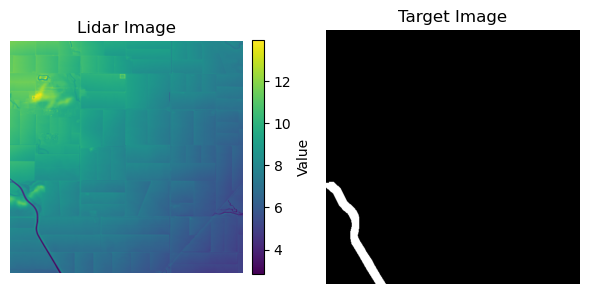

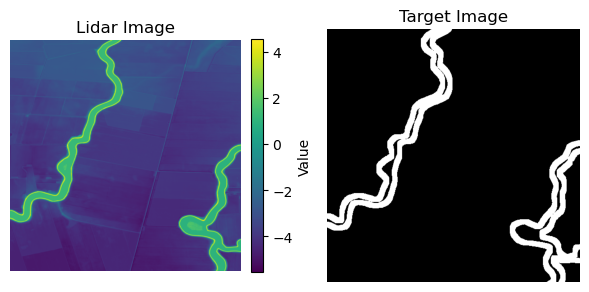

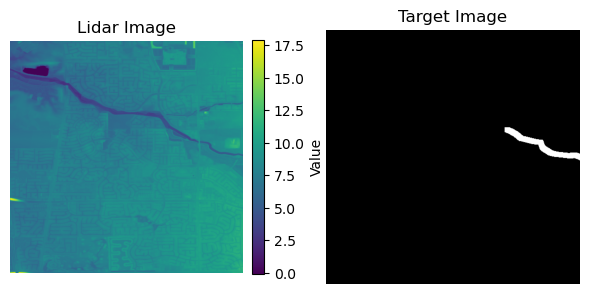

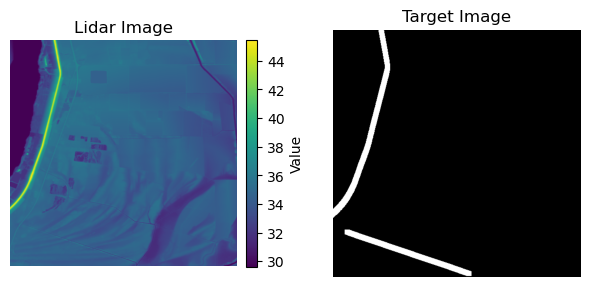

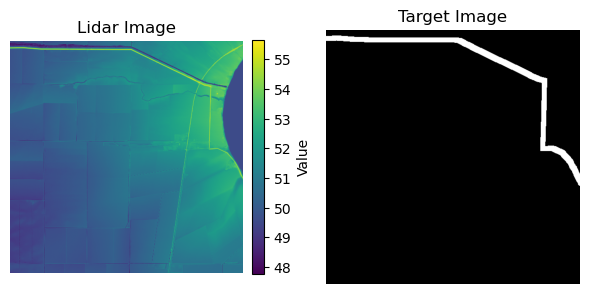

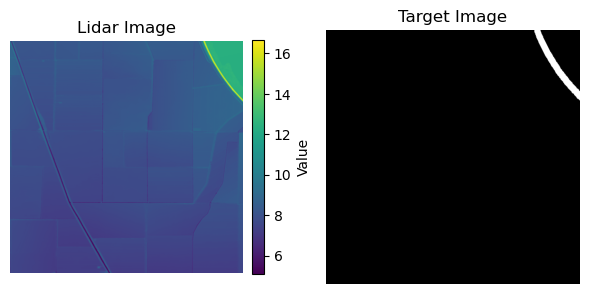

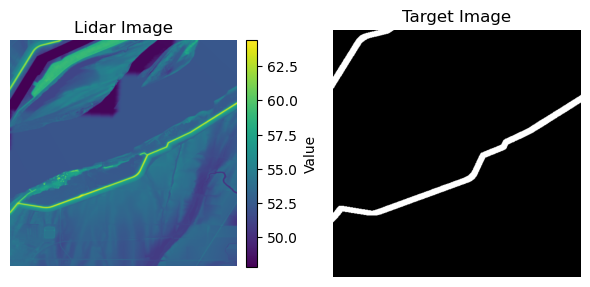

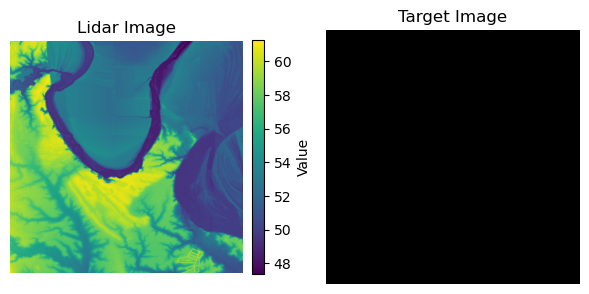

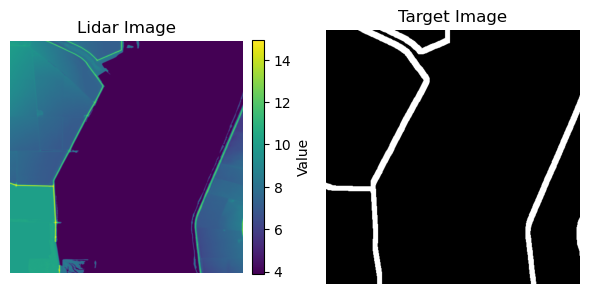

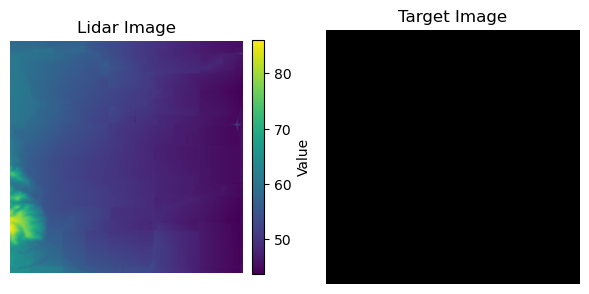

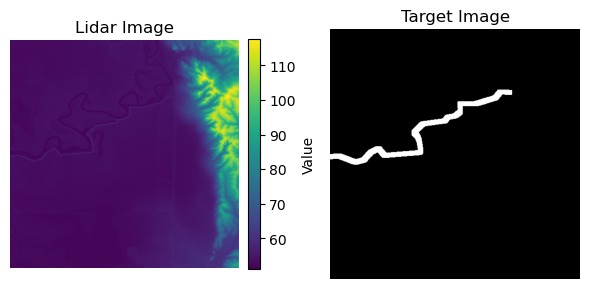

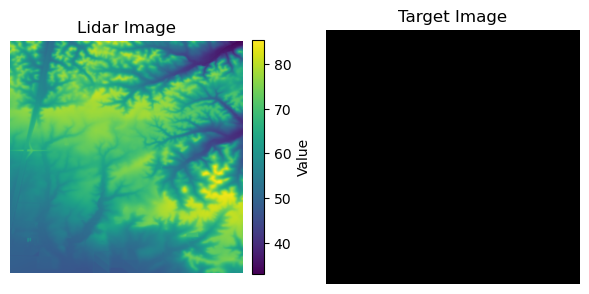

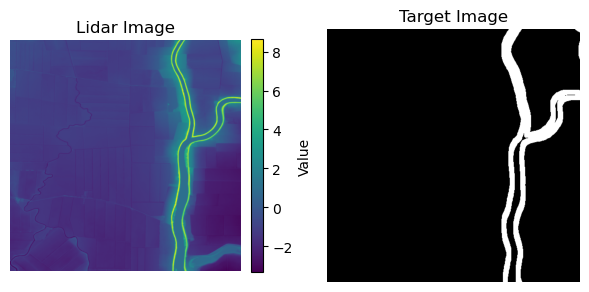

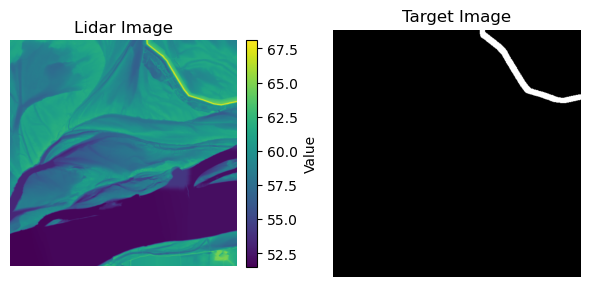

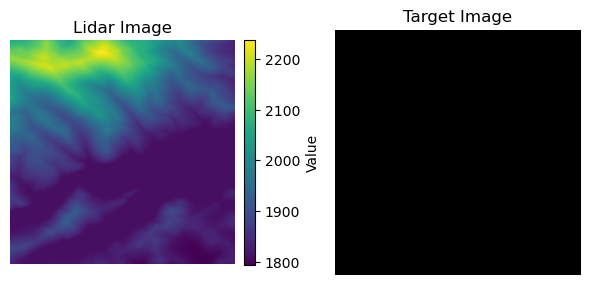

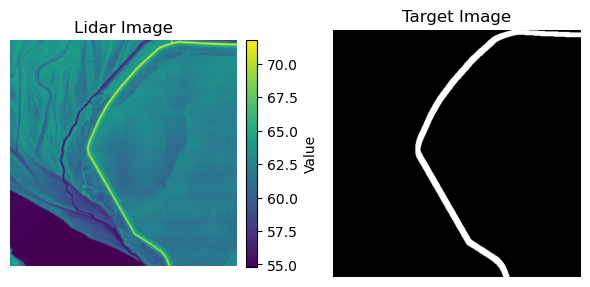

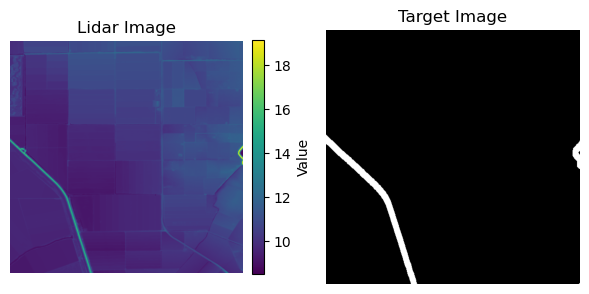

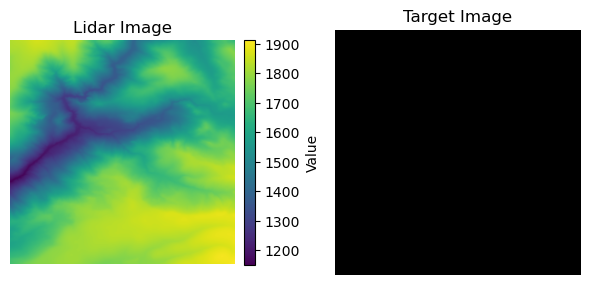

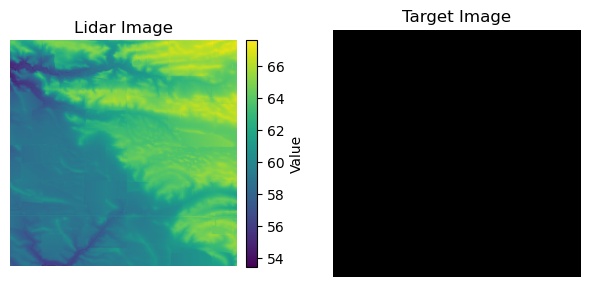

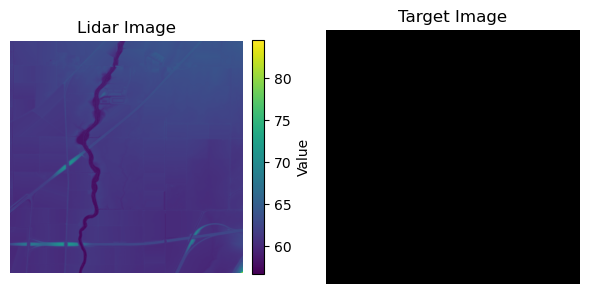

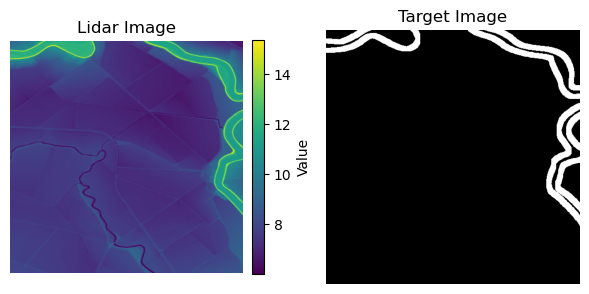

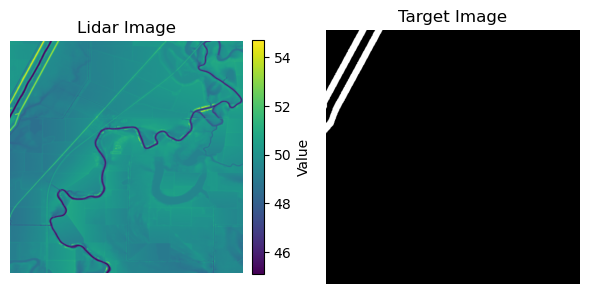

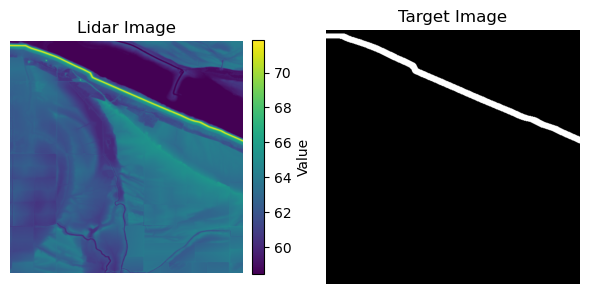

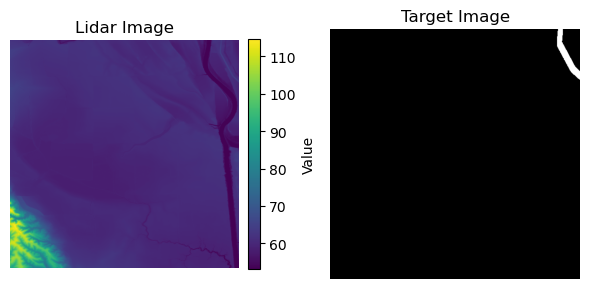

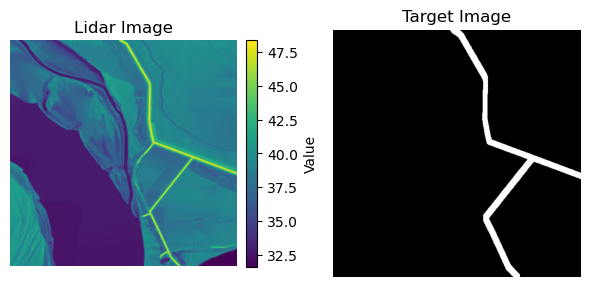

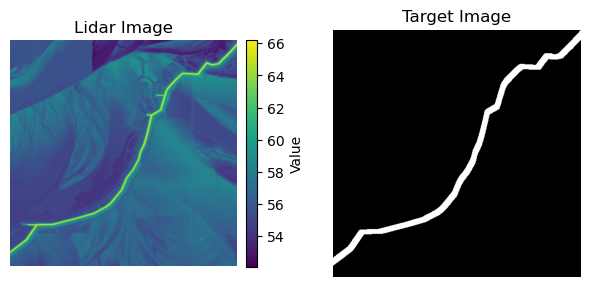

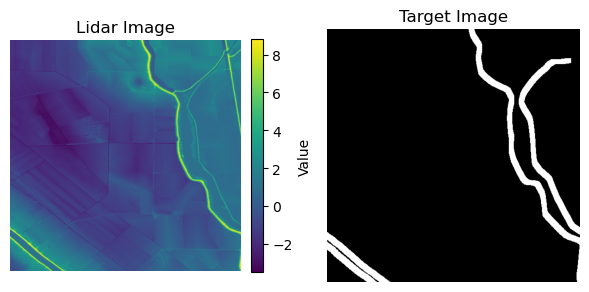

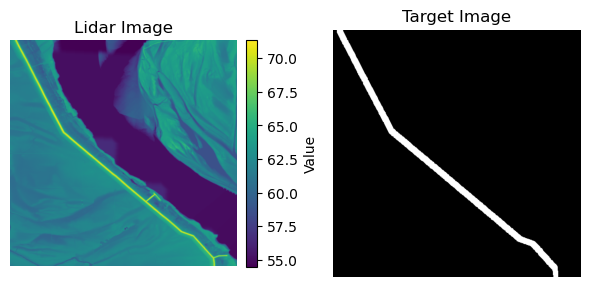

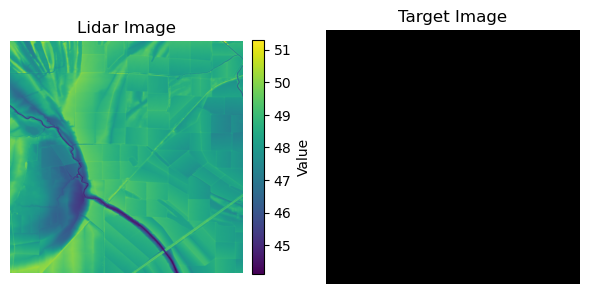

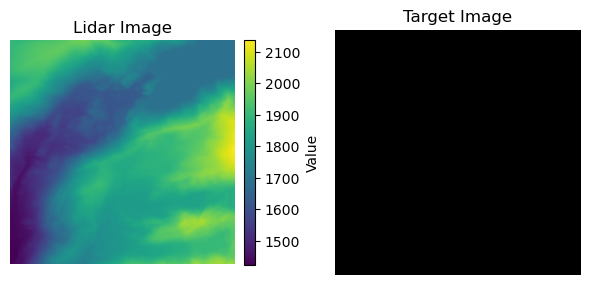

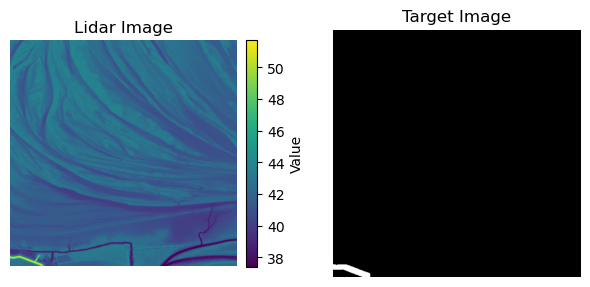

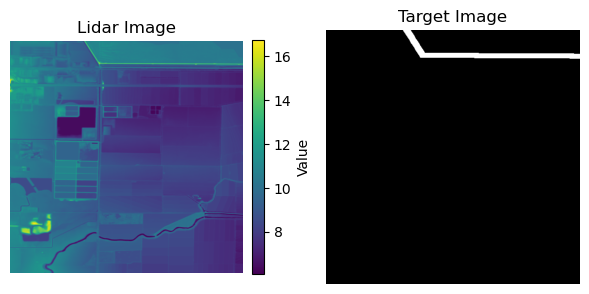

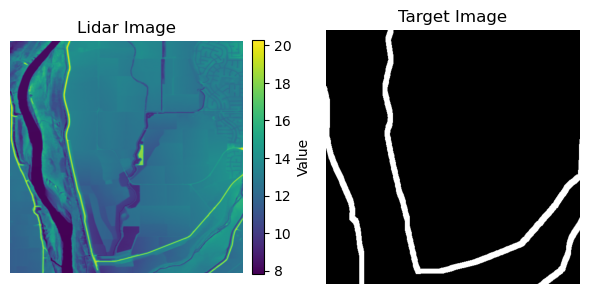

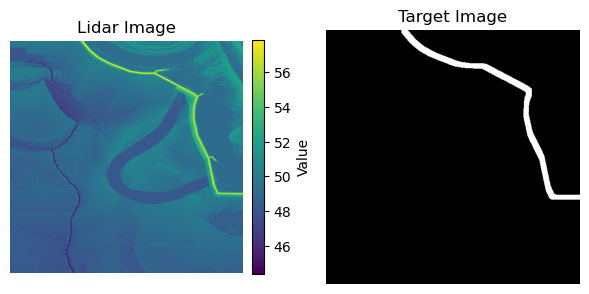

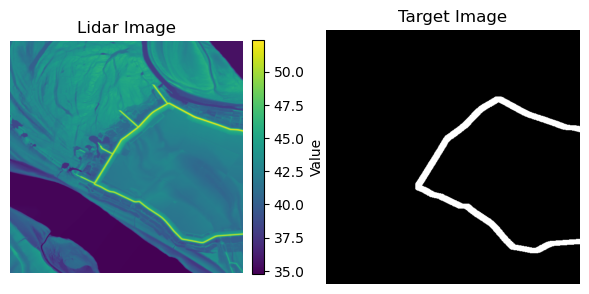

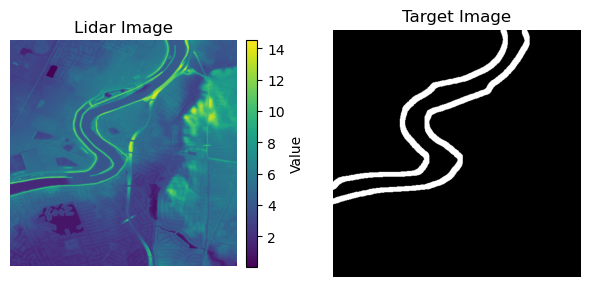

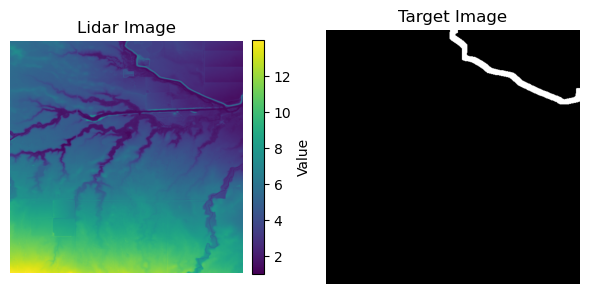

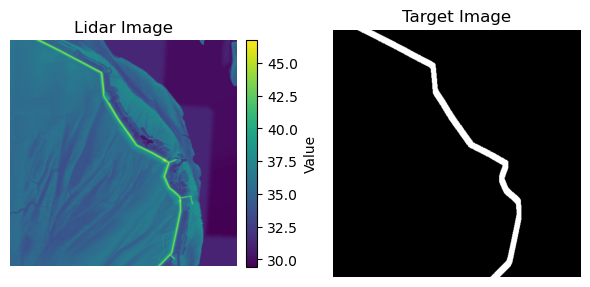

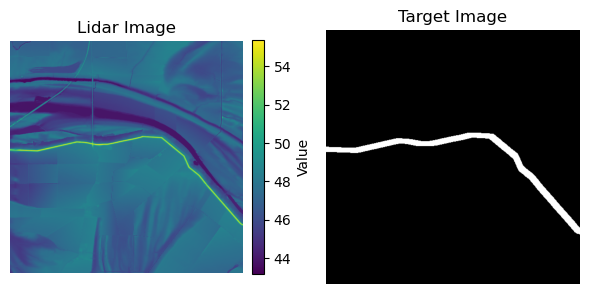

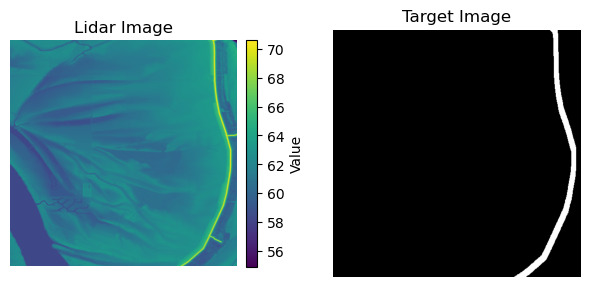

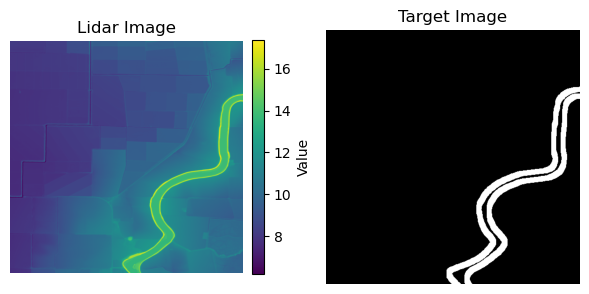

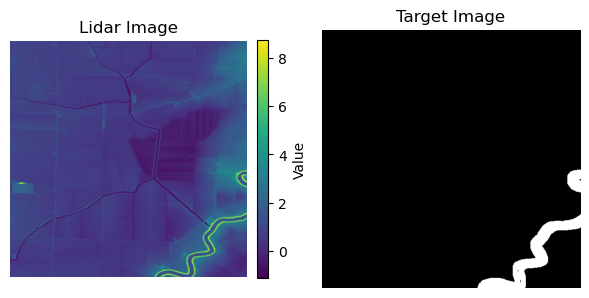

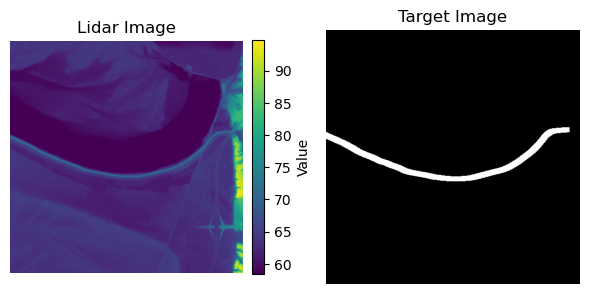

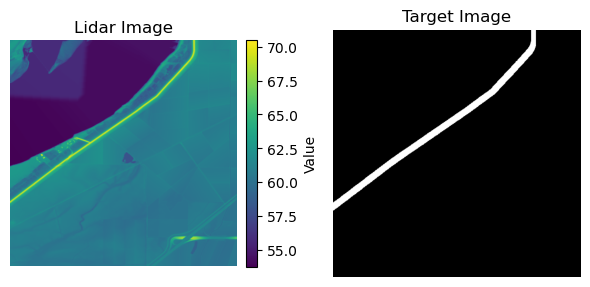

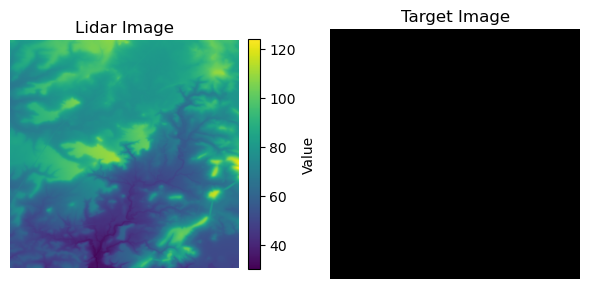

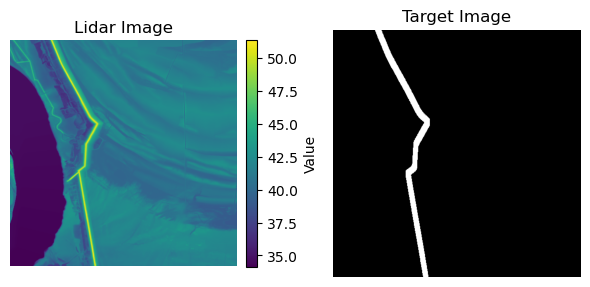

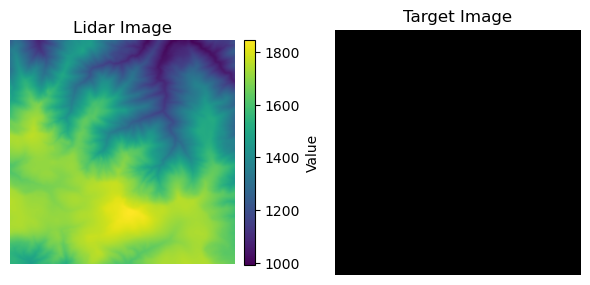

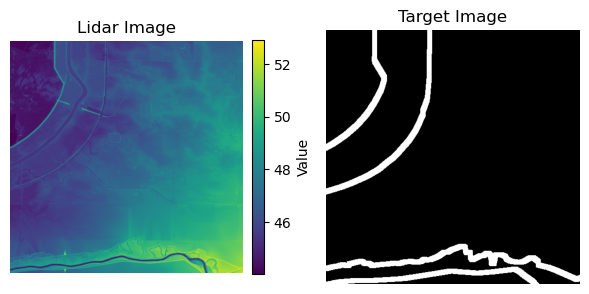

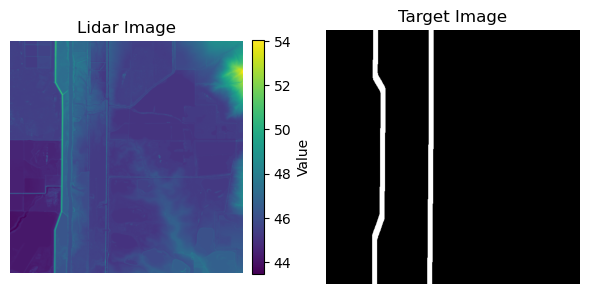

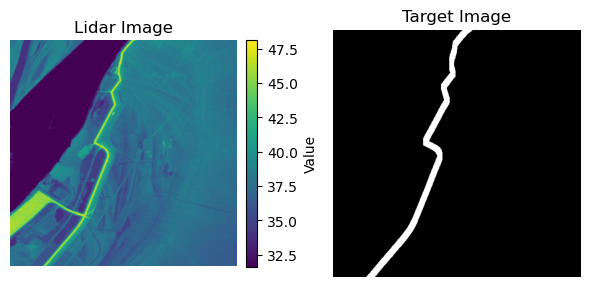

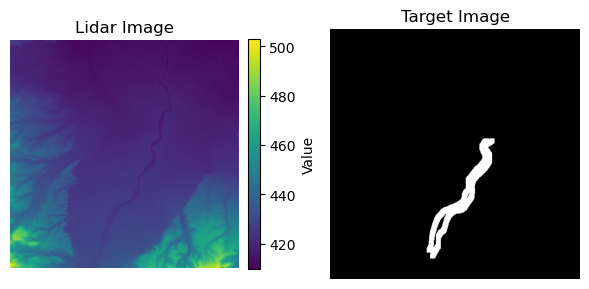

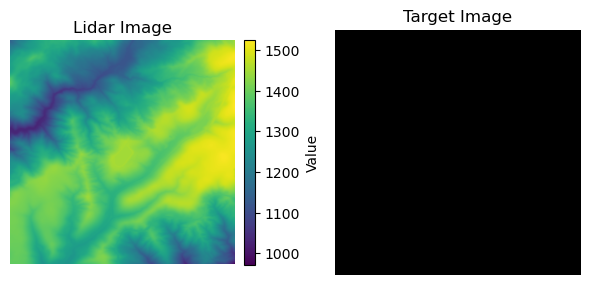

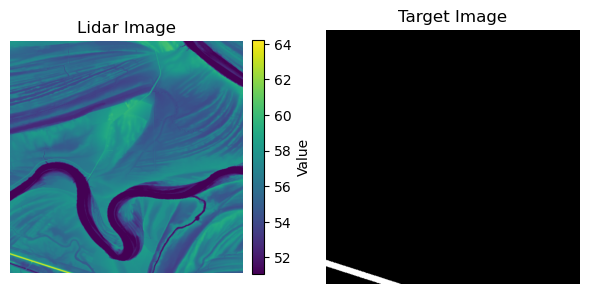

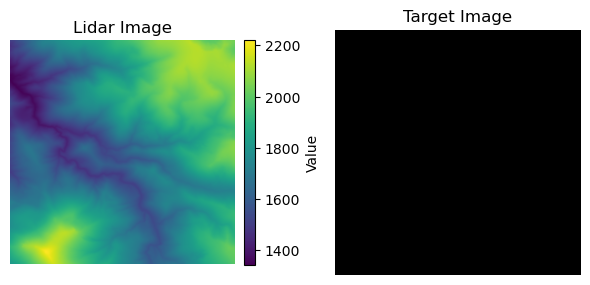

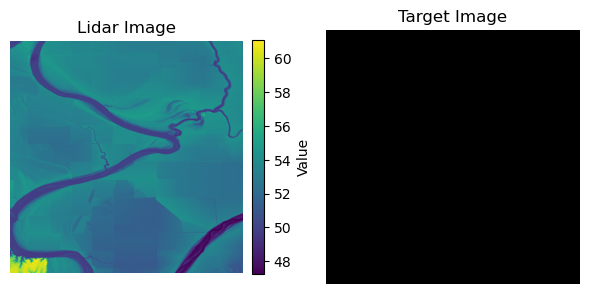

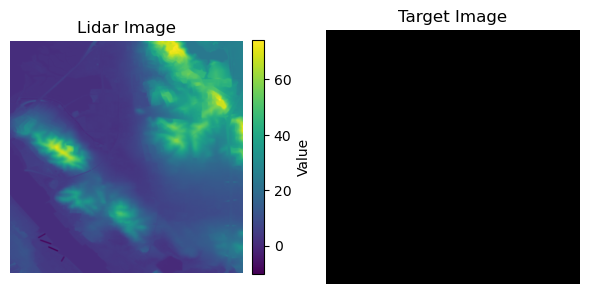

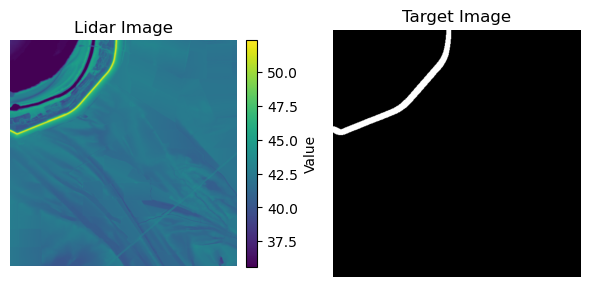

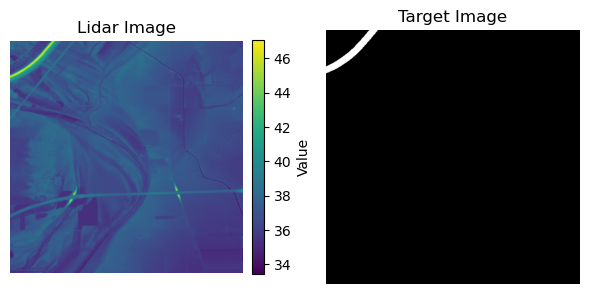

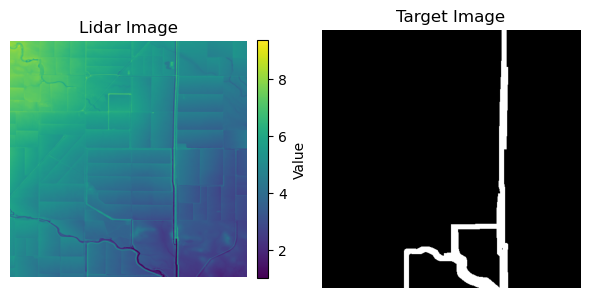

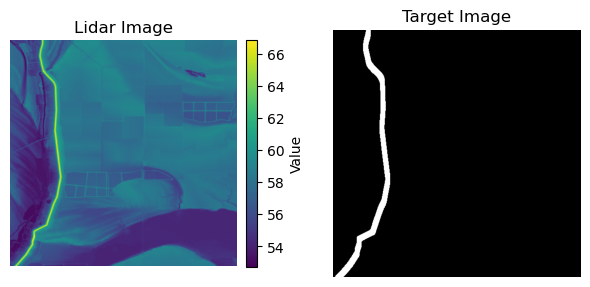

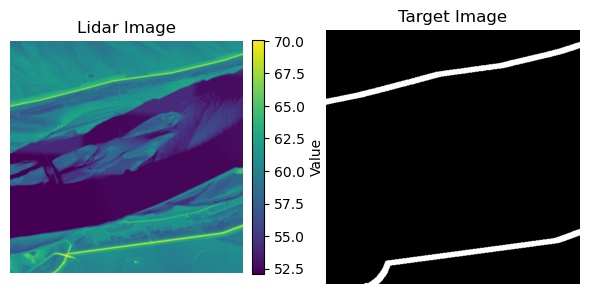

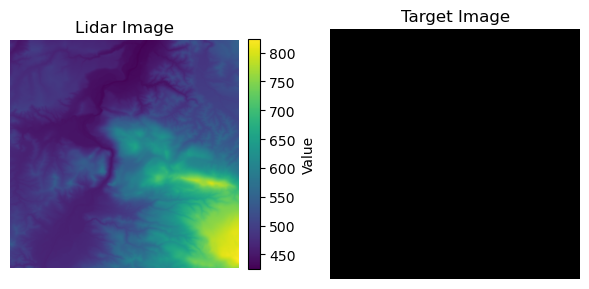

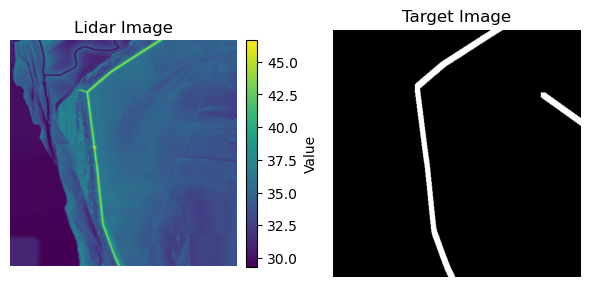

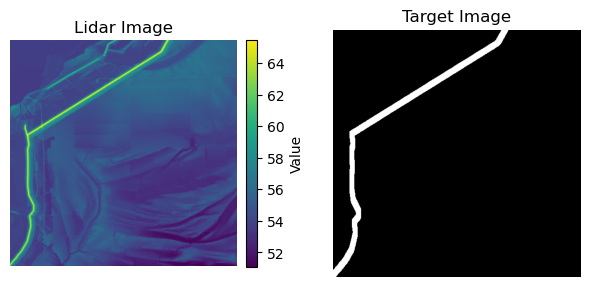

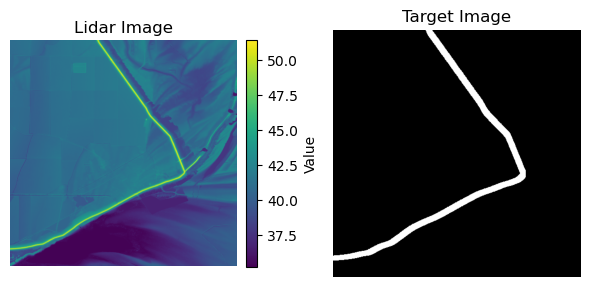

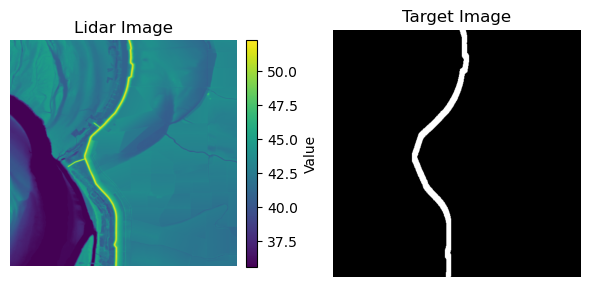

IndexError: index 86 is out of bounds for axis 0 with size 86

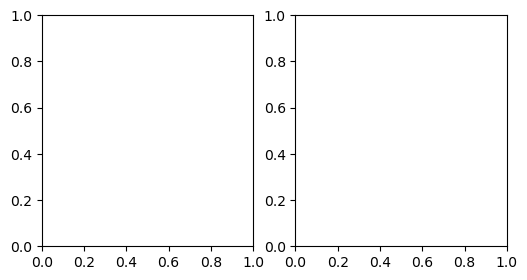

In [5]:
for ix in range(100):
    val_dataset_13.plot(ix, transform=False)